In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
loan_default = pd.read_csv('Loan_default.csv')

In [5]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [16]:
# Summary statistics for numerical columns
summary_stats = loan_default.describe()
print(loan_default.describe().to_latex())

# Number of unique values in each column
unique_counts = loan_default.nunique()

# Count of missing values in each column
missing_counts = loan_default.isnull().sum()

# Correlation matrix for numerical columns
correlation_matrix = loan_default.corr()

# Display these statistics
print("Summary Statistics:\n", summary_stats)
print("\nNumber of Unique Values:\n", unique_counts)
print("\nMissing Value Counts:\n", missing_counts)
print("\nCorrelation Matrix:\n", correlation_matrix)

C:\Users\chris\AppData\Local\Temp\ipykernel_6556\1876756320.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(loan_default.describe().to_latex())


\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &            Age &         Income &     LoanAmount &    CreditScore &  MonthsEmployed &  NumCreditLines &   InterestRate &       LoanTerm &       DTIRatio &        Default \\
\midrule
count &  255347.000000 &  255347.000000 &  255347.000000 &  255347.000000 &   255347.000000 &   255347.000000 &  255347.000000 &  255347.000000 &  255347.000000 &  255347.000000 \\
mean  &      43.498306 &   82499.304597 &  127578.865512 &     574.264346 &       59.541976 &        2.501036 &      13.492773 &      36.025894 &       0.500212 &       0.116128 \\
std   &      14.990258 &   38963.013729 &   70840.706142 &     158.903867 &       34.643376 &        1.117018 &       6.636443 &      16.969330 &       0.230917 &       0.320379 \\
min   &      18.000000 &   15000.000000 &    5000.000000 &     300.000000 &        0.000000 &        1.000000 &       2.000000 &      12.000000 &       0.100000 &       0.000000 \\
25\%   &      31.000000 &   48825.500000 &   66156.

C:\Users\chris\AppData\Local\Temp\ipykernel_6556\1876756320.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_default.corr()


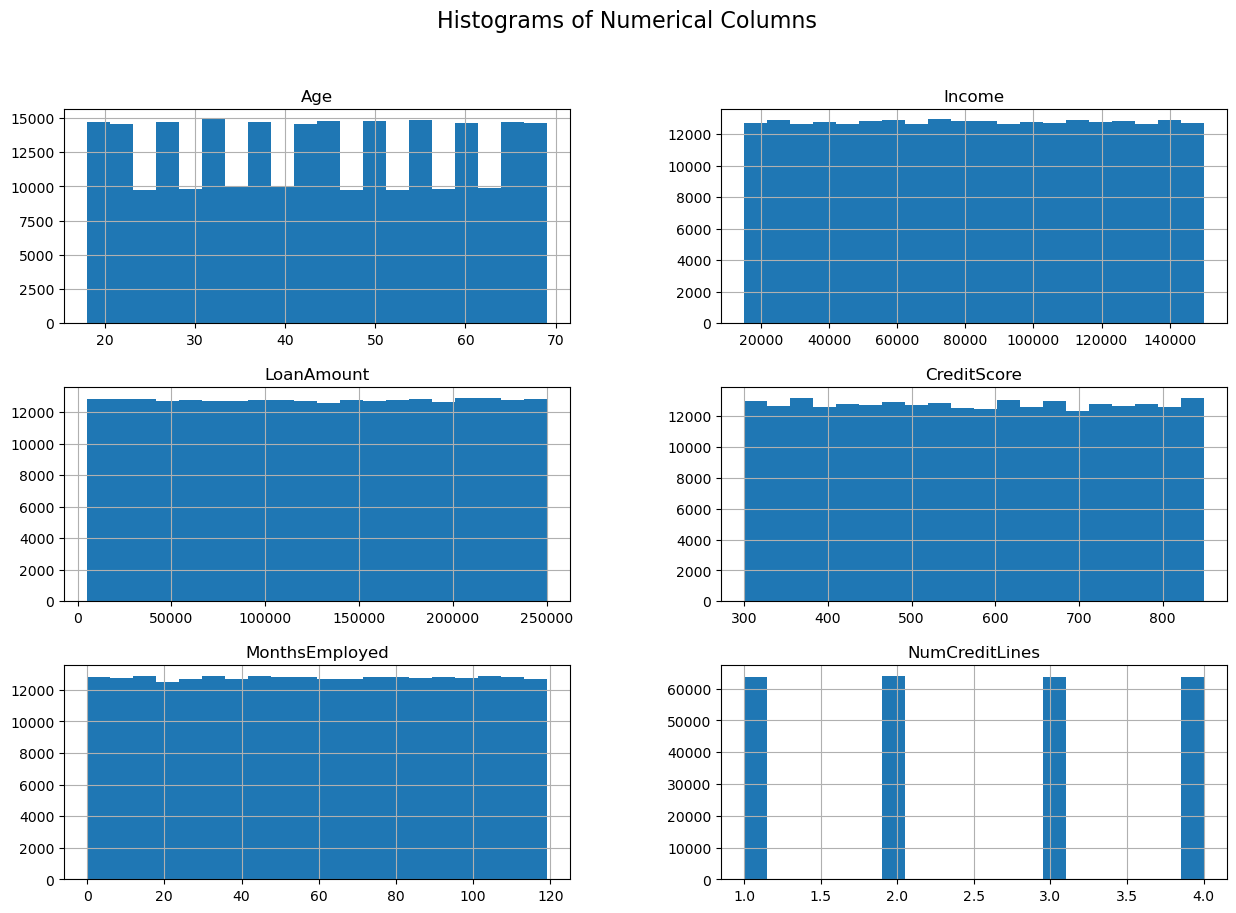

In [7]:
# Create histograms for numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines']
loan_default[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

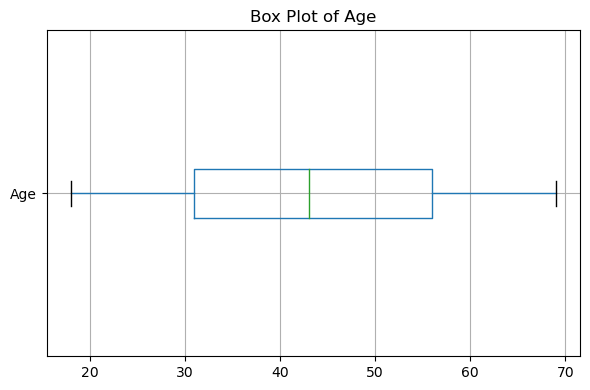

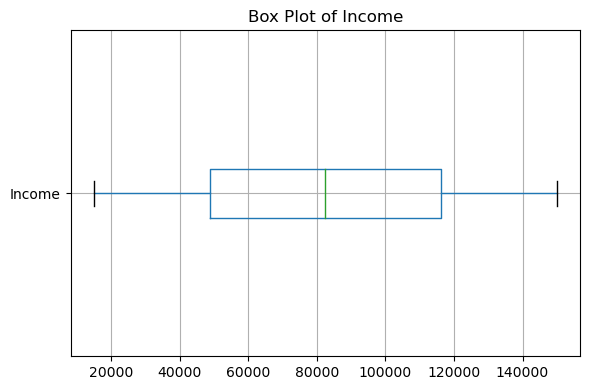

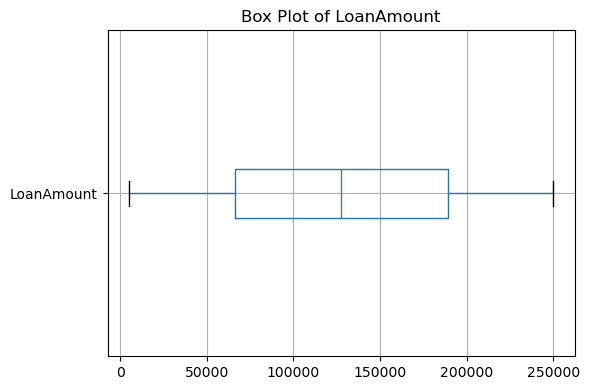

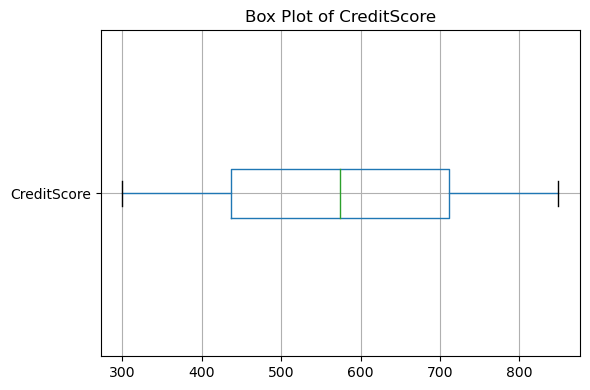

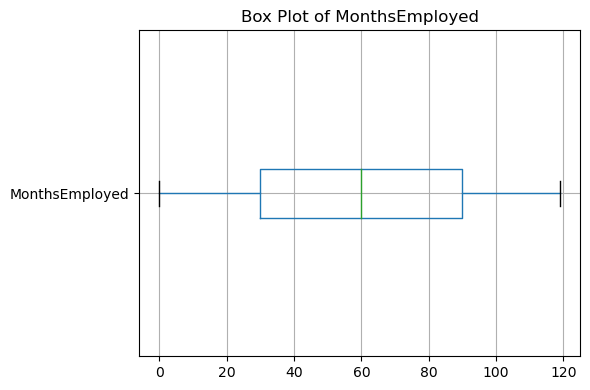

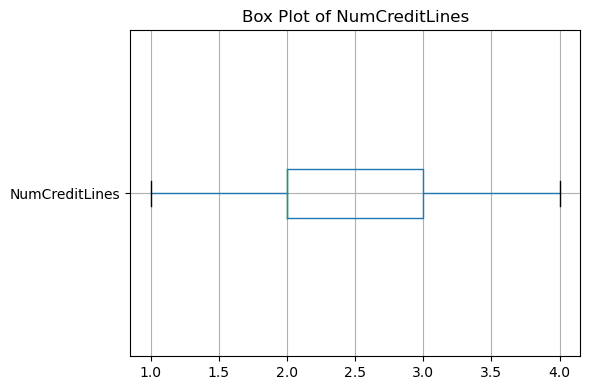

In [15]:
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
    loan_default.boxplot(column=col, vert=False)
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.tight_layout()
    plt.show()